In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [39]:
# Read the CSV file
df = pd.read_csv('spam.csv')

Data Cleaning

In [40]:
print(df.head(5))

# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [41]:
# Renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

# Encode target variable
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

print(df['target'].head(5))

# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicate values
print("\nDuplicate values:", df.duplicated().sum())

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32
Missing values:
target    0
text      0
dtype: int64

Duplicate values: 0


EDA

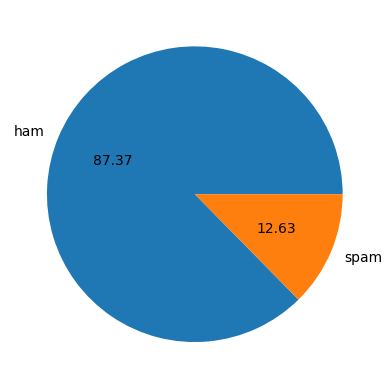

In [42]:
# Pie chart for target distribution
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Text Preprocessing

In [43]:
# Tokenization and feature extraction
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Descriptive statistics
print("\nDescriptive statistics:")
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

# Descriptive statistics for ham
print("\nDescriptive statistics for ham:")
print(df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe())

# Descriptive statistics for spam
print("\nDescriptive statistics for spam:")
print(df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe())

# Text preprocessing
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package punkt to C:\Users\Charu
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Descriptive statistics:
       num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.924163    18.456761       1.966531
std         58.175349    13.325633       1.449833
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

Descriptive statistics for ham:
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.457263    17.123782       1.820195
std         56.357463    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

Descriptive statistics for spam:
       n

[nltk_data] Downloading package stopwords to C:\Users\Charu
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def transform_text(text):
    stopwords_english = set(stopwords.words('english'))
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords_english and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [45]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [46]:

df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


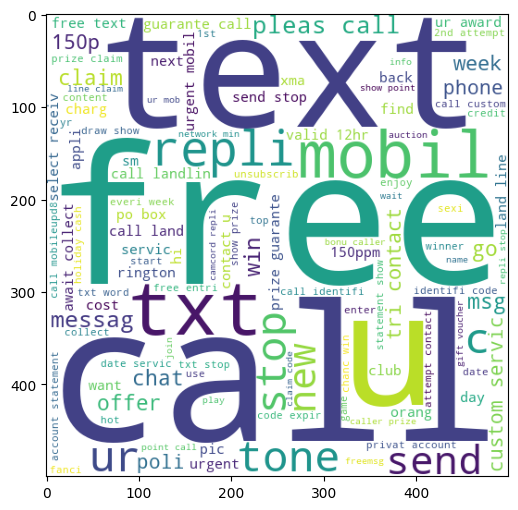

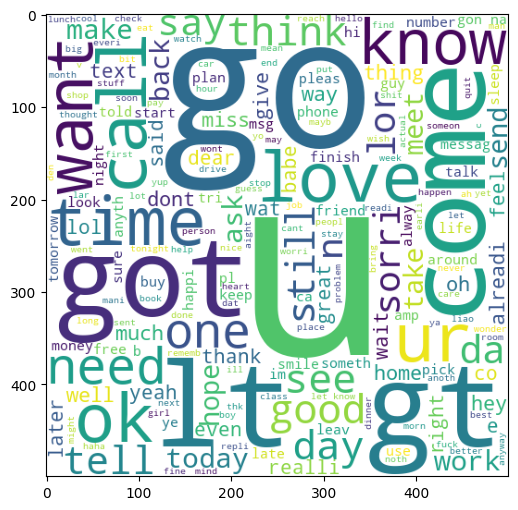

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus) 

9941

In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)        

35305

Model Building

In [51]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
# Print shapes of X and y
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (5169, 3000)
Shape of y: (5169,)


In [56]:
# Initialize Logistic Regression Classifier
lrc = LogisticRegression(solver='liblinear', penalty='l1')

# Dictionary of classifiers
clfs = {'Logistic Regression': lrc}

# Function to train classifier and calculate accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Train and evaluate classifiers
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For Logistic Regression
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697


In [60]:
# Input a sentence
sentence = input("Enter a sentence to test if it's spam or ham: ")

# Preprocess the input sentence
processed_sentence = transform_text(sentence)

# Vectorize the processed sentence
vectorized_sentence = tfidf.transform([processed_sentence]).toarray()

# Predict using the trained logistic regression classifier
prediction = lrc.predict(vectorized_sentence)

# Convert the prediction to human-readable form
prediction_label = 'spam' if prediction[0] == 1 else 'ham'

# Print the prediction
print("Prediction:", prediction_label)


Prediction: spam
